<a href="https://colab.research.google.com/github/krmonline/AnomalyDetection/blob/master/Anomaly_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
import requests
import re
import seaborn as sns
from scipy.stats import norm

# ตัวอย่าง CPU

In [ ]:
cpu = pd.read_csv("https://raw.githubusercontent.com/numenta/NAB/master/data/realAWSCloudwatch/ec2_cpu_utilization_53ea38.csv")

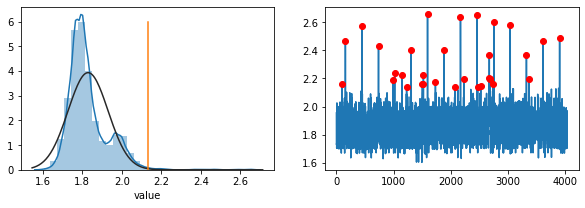

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(10, 3))
sns.distplot(cpu.value,bins=30,fit=norm,ax=axes[0])
#สร้าง Threshold ที่ 3SD หรือประมาณ 99.7% ของ Data ทั้งหมด
threshold = cpu.value.mean()+3*cpu.value.std()
axes[0].plot([u3sd,u3sd],[0,6])
axes[1].plot(cpu.value)
for  i in range(len(cpu.value)):
  if cpu.value.values[i] > threshold:
    #Remark Threshold
    axes[1].plot(i,cpu.value.values[i],'ro')

# ตัวอย่าง PM 2.5

In [ ]:
url = 'http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt'
r = requests.get(url)
a = r.content.splitlines()
pm = []
for i in a[:]:
  tmp = re.split('\\\\t',str(i))
  if len(tmp) >= 7:
    pm.append(tmp)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
Month_text  = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df = pd.DataFrame(pm,columns=['Year', 'Month', 'Day', 'UTC Hour', 'PM2.5', 'PM10_mask', 'Retrospective'])

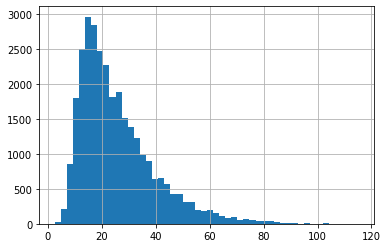

In [ ]:
df2 = df.astype({'Month': 'int32','PM2.5' : 'float'})
df2['PM2.5'].hist(bins=50)

Feb


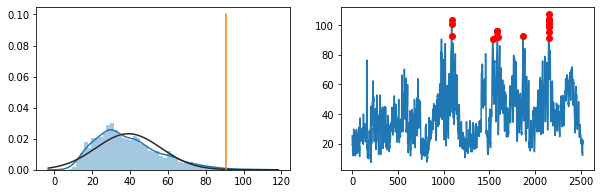

Mar


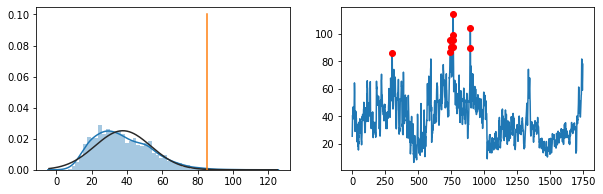

Apr


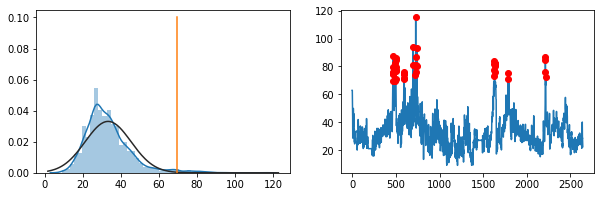

May


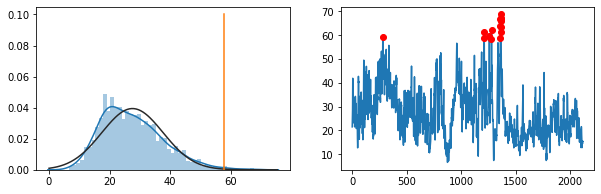

Jun


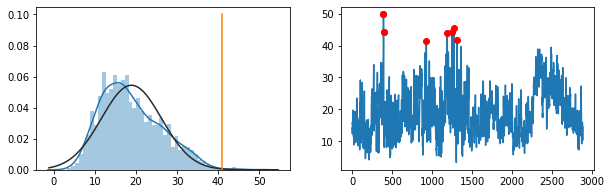

Jul


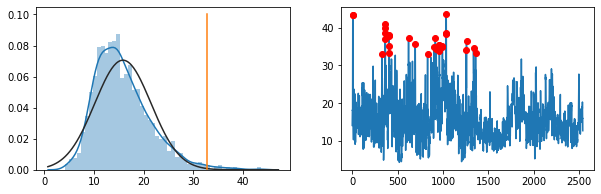

Aug


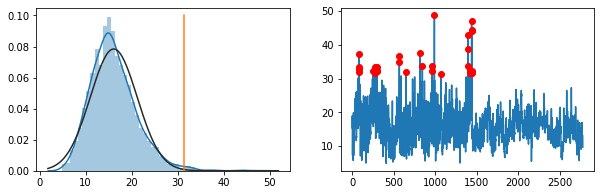

Sep


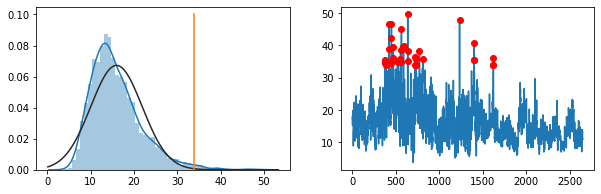

Oct


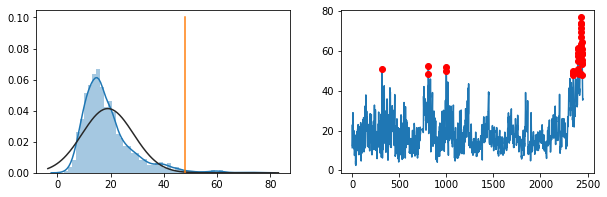

Nov


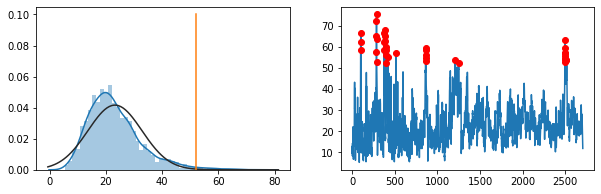

Dec


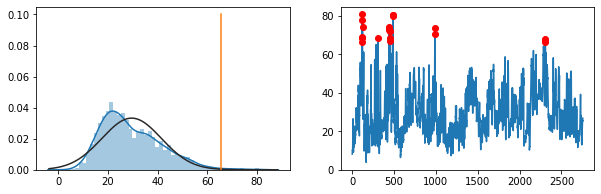

In [ ]:
for i in range(1,12):
  print(Month_text[i])
  pm2 = df2[df2.Month == i]['PM2.5']
  f, axes = plt.subplots(1, 2,figsize=(10, 3))
  sns.distplot(pm2.values,bins=50,fit=norm,ax=axes[0])
  arr_val = pm2.values
  u3sd = arr_val.mean()+3*arr_val.std()
  l3sd = arr_val.mean()-3*arr_val.std()
  axes[0].plot([u3sd,u3sd],[0,0.1])
  axes[1].plot(arr_val)
  for  i in range(len(arr_val)):
    if arr_val[i] > u3sd or arr_val[i] < l3sd:
      axes[1].plot(i,arr_val[i],'ro')
  plt.show()